In [32]:
%matplotlib widget

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, CheckButtons

INIT_PARAMS = {
    "amplitude": 1.0,
    "frequency": 1.0,
    "phase": 0.0,
    "noise_mean": 0.0,
    "noise_var": 0.1,
    "show_noise": True,
}

t = np.linspace(0, 2 * np.pi, 1000)
prev_noise = None  

def harmonic_with_noise(amplitude, frequency, phase, noise_mean, noise_var, show_noise, saved_noise=None):
    signal = amplitude * np.sin(frequency * t + phase)
    if show_noise:
        if saved_noise is None:
            noise = np.random.normal(noise_mean, np.sqrt(noise_var), size=len(t))
        else:
            noise = saved_noise
        return signal + noise, noise
    return signal, None


In [23]:
%matplotlib notebook

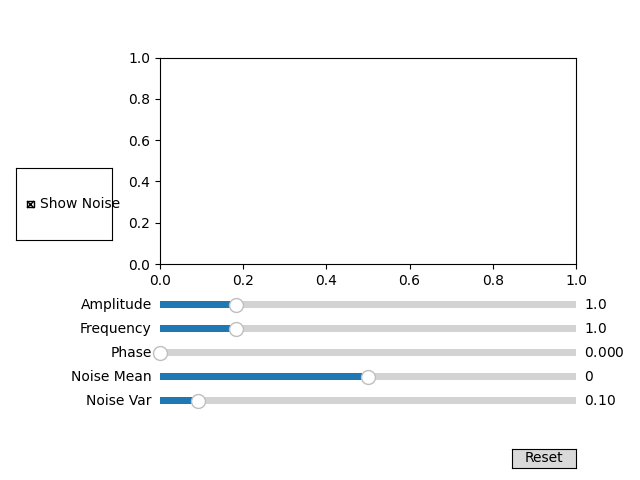

In [ ]:
fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.45)

signal, current_noise = harmonic_with_noise(
    amplitude = INIT_PARAMS["amplitude"],
    frequency = INIT_PARAMS["frequency"],
    phase     = INIT_PARAMS["phase"],
    noise_mean= INIT_PARAMS["noise_mean"],
    noise_var = INIT_PARAMS["noise_var"],
    show_noise= INIT_PARAMS["show_noise"]
)

slider_axes = {
    "amplitude": plt.axes([0.25, 0.35, 0.65, 0.03]),
    "frequency": plt.axes([0.25, 0.30, 0.65, 0.03]),
    "phase":     plt.axes([0.25, 0.25, 0.65, 0.03]),
    "noise_mean": plt.axes([0.25, 0.20, 0.65, 0.03]),
    "noise_var": plt.axes([0.25, 0.15, 0.65, 0.03])
}

sliders = {
    "amplitude": Slider(slider_axes["amplitude"], "Amplitude", 0.1, 5.0, valinit=INIT_PARAMS["amplitude"]),
    "frequency": Slider(slider_axes["frequency"], "Frequency", 0.1, 5.0, valinit=INIT_PARAMS["frequency"]),
    "phase":     Slider(slider_axes["phase"], "Phase", 0, 2*np.pi, valinit=INIT_PARAMS["phase"]),
    "noise_mean": Slider(slider_axes["noise_mean"], "Noise Mean", -1.0, 1.0, valinit=INIT_PARAMS["noise_mean"]),
    "noise_var": Slider(slider_axes["noise_var"], "Noise Var", 0.01, 1.0, valinit=INIT_PARAMS["noise_var"])
}

checkbox_ax = plt.axes([0.025, 0.5, 0.15, 0.15])
checkbox = CheckButtons(checkbox_ax, ["Show Noise"], [INIT_PARAMS["show_noise"]])

reset_ax = plt.axes([0.8, 0.025, 0.1, 0.04])
reset_button = Button(reset_ax, 'Reset')


In [ ]:
def update(val):
    global current_noise
    params = {
        key: sliders[key].val for key in sliders
    }
    show_noise = checkbox.get_status()[0]
    
    if val in (sliders["noise_mean"], sliders["noise_var"], checkbox):
        current_noise = None

    y, current_noise = harmonic_with_noise(**params, show_noise=show_noise, saved_noise=current_noise)
    line.set_ydata(y)
    fig.canvas.draw_idle()

for slider in sliders.values():
    slider.on_changed(update)

checkbox.on_clicked(update)


1

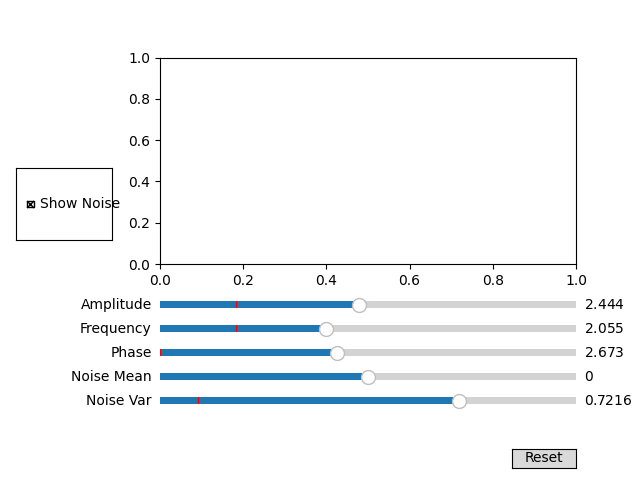

In [ ]:
def reset(event):
    global current_noise
    for key, slider in sliders.items():
        slider.reset()
    current_noise = None
    if checkbox.get_status()[0] != INIT_PARAMS["show_noise"]:
        checkbox.set_active(0)
    update(None)

reset_button.on_clicked(reset)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, CheckButtons
from scipy.signal import butter, filtfilt

INIT_PARAMS = {
    "amplitude": 1.0,
    "frequency": 1.0,
    "phase": 0.0,
    "noise_mean": 0.0,
    "noise_var": 0.1,
    "show_noise": True,
    "cutoff": 2.0
}

t = np.linspace(0, 2 * np.pi, 1000)
current_noise = None


In [37]:
def harmonic_with_noise(amplitude, frequency, phase, noise_mean, noise_var, show_noise, saved_noise=None):
    signal = amplitude * np.sin(frequency * t + phase)
    if show_noise:
        if saved_noise is None:
            noise = np.random.normal(noise_mean, np.sqrt(noise_var), size=len(t))
        else:
            noise = saved_noise
        return signal + noise, noise
    return signal, None

def apply_filter(data, cutoff_freq=2.0, fs=1000, order=4):
    nyq = 0.5 * fs
    normal_cutoff = cutoff_freq / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, data)


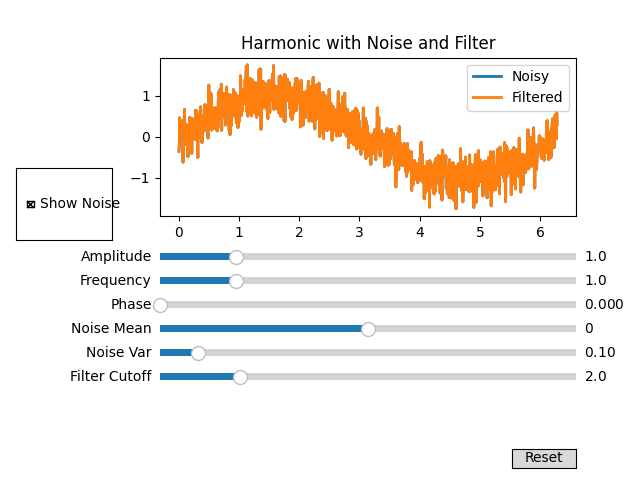

In [ ]:
fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.55)

signal, current_noise = harmonic_with_noise(
    amplitude=INIT_PARAMS["amplitude"],
    frequency=INIT_PARAMS["frequency"],
    phase=INIT_PARAMS["phase"],
    noise_mean=INIT_PARAMS["noise_mean"],
    noise_var=INIT_PARAMS["noise_var"],
    show_noise=INIT_PARAMS["show_noise"]
)

line, = ax.plot(t, signal, lw=2, label="Noisy")
filtered_line, = ax.plot(t, signal, lw=2, label="Filtered")
ax.legend()
ax.set_title("Harmonic with Noise and Filter")

slider_axes = {
    "amplitude": plt.axes([0.25, 0.45, 0.65, 0.03]),
    "frequency": plt.axes([0.25, 0.40, 0.65, 0.03]),
    "phase":     plt.axes([0.25, 0.35, 0.65, 0.03]),
    "noise_mean": plt.axes([0.25, 0.30, 0.65, 0.03]),
    "noise_var": plt.axes([0.25, 0.25, 0.65, 0.03]),
    "cutoff": plt.axes([0.25, 0.20, 0.65, 0.03])
}

sliders = {
    "amplitude": Slider(slider_axes["amplitude"], "Amplitude", 0.1, 5.0, valinit=INIT_PARAMS["amplitude"]),
    "frequency": Slider(slider_axes["frequency"], "Frequency", 0.1, 5.0, valinit=INIT_PARAMS["frequency"]),
    "phase":     Slider(slider_axes["phase"], "Phase", 0.0, 2*np.pi, valinit=INIT_PARAMS["phase"]),
    "noise_mean": Slider(slider_axes["noise_mean"], "Noise Mean", -1.0, 1.0, valinit=INIT_PARAMS["noise_mean"]),
    "noise_var": Slider(slider_axes["noise_var"], "Noise Var", 0.01, 1.0, valinit=INIT_PARAMS["noise_var"]),
    "cutoff": Slider(slider_axes["cutoff"], "Filter Cutoff", 0.1, 10.0, valinit=INIT_PARAMS["cutoff"])
}

checkbox_ax = plt.axes([0.025, 0.5, 0.15, 0.15])
checkbox = CheckButtons(checkbox_ax, ["Show Noise"], [INIT_PARAMS["show_noise"]])

reset_ax = plt.axes([0.8, 0.025, 0.1, 0.04])
reset_button = Button(reset_ax, 'Reset')


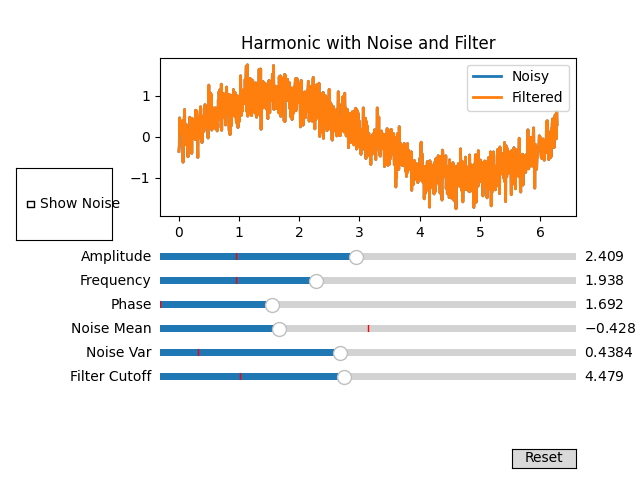

In [39]:
def update(val):
    global current_noise
    params = {
        key: sliders[key].val for key in ["amplitude", "frequency", "phase", "noise_mean", "noise_var"]
    }
    cutoff = sliders["cutoff"].val
    show_noise = checkbox.get_status()[0]

    if val in (sliders["noise_mean"], sliders["noise_var"], checkbox):
        current_noise = None

    y, current_noise = harmonic_with_noise(**params, show_noise=show_noise, saved_noise=current_noise)
    line.set_ydata(y)

    if show_noise:
        y_filtered = apply_filter(y, cutoff_freq=cutoff)
        filtered_line.set_ydata(y_filtered)
    else:
        filtered_line.set_ydata(y)

    fig.canvas.draw_idle()

def reset(event):
    global current_noise
    for slider in sliders.values():
        slider.reset()
    current_noise = None
    if checkbox.get_status()[0] != INIT_PARAMS["show_noise"]:
        checkbox.set_active(0)
    update(None)

for slider in sliders.values():
    slider.on_changed(update)
checkbox.on_clicked(update)
reset_button.on_clicked(reset)

plt.show()


In [ ]:
import numpy as np
import plotly.graph_objects as go
from ipywidgets import interact, FloatSlider, Checkbox

t = np.linspace(0, 2 * np.pi, 1000)

def custom_filter(signal, window_size=5):
    return np.convolve(signal, np.ones(window_size)/window_size, mode='same')

def plot_harmonic(amplitude=1.0, frequency=1.0, phase=0.0,
                  noise_mean=0.0, noise_var=0.1,
                  show_noise=True, apply_filter=False):
    
    clean = amplitude * np.sin(frequency * t + phase)
    noise = np.random.normal(noise_mean, np.sqrt(noise_var), size=len(t))
    noisy = clean + noise if show_noise else clean
    filtered = custom_filter(noisy) if apply_filter else None

    fig = go.Figure()

    fig.add_trace(go.Scatter(x=t, y=clean, mode='lines', name='Чиста гармоніка', line=dict(dash='dash')))
    
    if show_noise:
        fig.add_trace(go.Scatter(x=t, y=noisy, mode='lines', name='З шумом'))

    if apply_filter:
        fig.add_trace(go.Scatter(x=t, y=filtered, mode='lines', name='Відфільтрована', line=dict(color='green')))

    fig.update_layout(
        title="Інтерактивна гармоніка (Plotly)",
        xaxis_title="Час",
        yaxis_title="Амплітуда",
        showlegend=True,
        height=500
    )

    fig.show()

interact(
    plot_harmonic,
    amplitude=FloatSlider(min=0.1, max=5.0, step=0.1, value=1.0, description="Амплітуда"),
    frequency=FloatSlider(min=0.1, max=5.0, step=0.1, value=1.0, description="Частота"),
    phase=FloatSlider(min=0.0, max=2*np.pi, step=0.1, value=0.0, description="Фаза"),
    noise_mean=FloatSlider(min=-1.0, max=1.0, step=0.1, value=0.0, description="Шум (середнє)"),
    noise_var=FloatSlider(min=0.01, max=1.0, step=0.05, value=0.1, description="Шум (дисперсія)"),
    show_noise=Checkbox(value=True, description="Показати шум"),
    apply_filter=Checkbox(value=False, description="Фільтрувати")
);


interactive(children=(FloatSlider(value=1.0, description='Амплітуда', max=5.0, min=0.1), FloatSlider(value=1.0…